### Datos de Api: LOOPNET

Se hace el llamado a una Api de Bienes Raices, para poder obtener los negocios en venta en Nyeva Jersey, y poder conseguir un estimado del valor de los locales

In [14]:
import requests
import pandas as pd

url = "https://loopnet-api.p.rapidapi.com/loopnet/business/advanceSearch"

payload = {
    "categories": ["Food & Related products"],
    "askingPriceMin": None,
    "askingPriceMax": None,
    "cashFlowMin": None,
    "cashFlowMax": None,
    "grossRevenueMin": None,
    "grossRevenueMax": None,
    "establishedAfterYear": None,
    "daysListedAgo": None,
    "page": 1,
    "hideListingsWithoutAskingPrice": None,
    "onlyShowListingsWithSellerFinancing": None,
    "onlyShowBusinessesWithRealEstate": None,
    "onlyShowRelocatableListings": None,
    "hideFranchiseOpportunities": None,
    "keyword": None,
    "locations": [
        {
            "geoType": 20,
            "regionId": "32",
            "countryCode": "US",
            "countryId": "US",
            "stateCode": "NJ",
            "cityId": 97,
            "metroAreaId": 0,
            "regionName": "New Jersey",
            "regionNameSeo": "new-jersey",
            "displayName": "New Jersey, NJ",
            "locationDetected": False
        }
    ]
}
headers = {
    "x-rapidapi-key": "7c348c234fmsha7a75fdeaf9a5fdp10e68fjsne66417e365c7",
    "x-rapidapi-host": "loopnet-api.p.rapidapi.com",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

# Extraer los datos del JSON de la respuesta
data = response.json()['data']

# Convertir los datos en un DataFrame
df = pd.DataFrame(data)

# Ver el DataFrame
df


,listNumber,absenteeOwner,account,addressConfidential,adLevelId,adLine,askingPrice,askingPricePerSquareFoot,bizQuestPrimaryCategoryId,bizQuestPrimarySubcategoryId,...,visibilityStatusChangedDate,websiteConfidential,yearEstablished,yearOfConstruction,zip,urlStub,locationDetail,locationDetailCrumbs,searchOffset,auctionDetail
0,2326665,False,1593.0,True,4,Seafood Market for Sale in New Jersey,750000.0,None,10,222,...,None,False,2011.0,None,None,/Business-Opportunity/seafood-market-for-sale-...,"Burlington County, NJ",None,0,None
1,2313707,False,NaN,True,1,philly pretzel factory,150000.0,None,10,221,...,None,False,2020.0,None,08012,/Business-Opportunity/productive-family-busine...,"Washington Township, NJ",None,1,None
2,2292232,False,1179.0,True,4,Manufacturing Distribution Business For Sale,2100000.0,None,10,221,...,None,False,1925.0,None,None,/Business-Opportunity/candy-manufacturing-dist...,New Jersey,None,2,None
3,2309376,False,NaN,False,1,"PET Bottle Blowing Machine, 3 Cavities, chille...",135000.0,None,10,221,...,None,False,2019.0,None,07011,/Business-Asset/pet-bottle-blowing-machine-3-c...,"Clifton, NJ",None,3,None
4,2258919,False,1976.0,True,4,GREAT START UP BUSINESS needs SOCIAL MEDIA EXP...,25000.0,None,10,221,...,None,False,2020.0,None,08034,/Business-Asset/asset-sale-creative-internet-s...,"Cherry Hill, NJ",None,4,None
5,2329114,False,45742.0,False,3,None,350000.0,None,10,224,...,None,False,NaN,None,08753,/Business-Opportunity/be-your-own-boss-incredi...,"Toms River, NJ",None,5,None
6,2320695,False,48404.0,True,3,None,127599.0,None,10,221,...,2025-01-14T15:48:18,True,1988.0,None,07030,/Business-Opportunity/flexible-vending-busines...,"Hoboken, NJ",None,6,None
7,2320389,False,49624.0,True,3,None,400000.0,None,10,221,...,2025-01-14T13:21:41,False,2005.0,None,07109,/Business-Opportunity/italian-frozen-foods-bus...,"Belleville, NJ",None,7,None
8,2311769,False,1593.0,True,3,None,1100000.0,None,18,269,...,None,False,1930.0,None,None,/Business-Opportunity/niche-manufacturer-for-s...,"Bergen County, NJ",None,8,None
9,2297199,False,388.0,True,3,None,300000.0,None,19,277,...,None,False,NaN,None,None,/Business-Opportunity/profitable-bread-route-f...,"Somerset County, NJ",None,9,None


#### Limpieza de datos

Se procede a eliminar las columnas que no nos sirven, para poder tener datos más limpios.
Dejando:

    heading: Titulo de la publicacion

    askingPrice: Precio de la venta

    streetAddress: Direccion del local

    locationDetail: Nos da la indormacion del Estado, y en algunos casos tambien la ciudad

    zip: El Zipcode del local


In [23]:
df_limpio = df[["heading", "askingPrice", "streetAddress", "locationDetail", "zip"]]

In [24]:
df_limpio

,heading,askingPrice,streetAddress,locationDetail,zip
0,Seafood Market for Sale in New Jersey,750000.0,None,"Burlington County, NJ",None
1,productive family business,150000.0,None,"Washington Township, NJ",08012
2,"Candy Manufacturing, Distribution and Retail B...",2100000.0,None,New Jersey,None
3,"PET Bottle Blowing Machine, 3 Cavities, chille...",135000.0,791 Paulison Ave,"Clifton, NJ",07011
4,Asset Sale - Creative Internet Sales Of Unique...,25000.0,None,"Cherry Hill, NJ",08034
5,Be your own boss Incredible opportunity to own...,350000.0,"1611 Rt 37 E. Tom's River, NJ 08753","Toms River, NJ",08753
6,Flexible Vending Business with Advanced Techno...,127599.0,None,"Hoboken, NJ",07030
7,Italian Frozen Foods Business for Sale,400000.0,None,"Belleville, NJ",07109
8,Niche Manufacturer for Sale in NJ,1100000.0,None,"Bergen County, NJ",None
9,Profitable Bread Route For Sale,300000.0,None,"Somerset County, NJ",None


In [25]:
df_limpio = df_limpio.dropna(subset=["askingPrice"])

In [26]:
df_limpio

,heading,askingPrice,streetAddress,locationDetail,zip
0,Seafood Market for Sale in New Jersey,750000.0,None,"Burlington County, NJ",None
1,productive family business,150000.0,None,"Washington Township, NJ",08012
2,"Candy Manufacturing, Distribution and Retail B...",2100000.0,None,New Jersey,None
3,"PET Bottle Blowing Machine, 3 Cavities, chille...",135000.0,791 Paulison Ave,"Clifton, NJ",07011
4,Asset Sale - Creative Internet Sales Of Unique...,25000.0,None,"Cherry Hill, NJ",08034
5,Be your own boss Incredible opportunity to own...,350000.0,"1611 Rt 37 E. Tom's River, NJ 08753","Toms River, NJ",08753
6,Flexible Vending Business with Advanced Techno...,127599.0,None,"Hoboken, NJ",07030
7,Italian Frozen Foods Business for Sale,400000.0,None,"Belleville, NJ",07109
8,Niche Manufacturer for Sale in NJ,1100000.0,None,"Bergen County, NJ",None
9,Profitable Bread Route For Sale,300000.0,None,"Somerset County, NJ",None


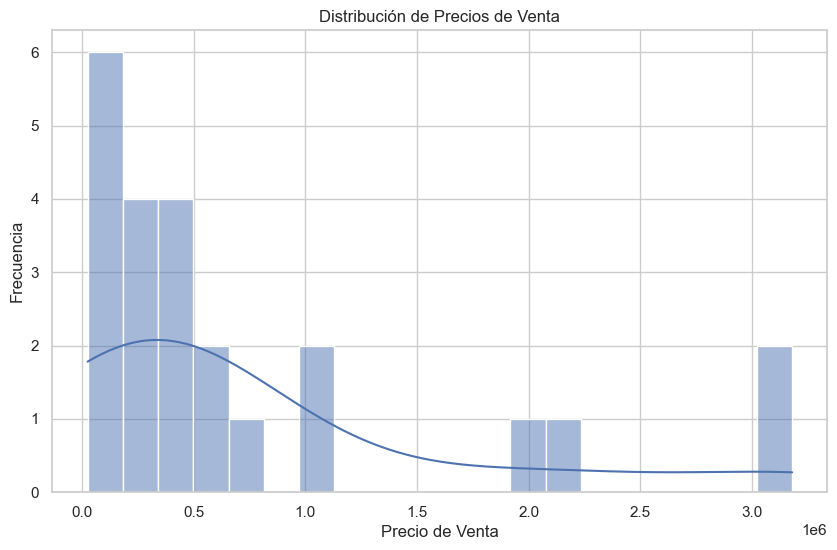

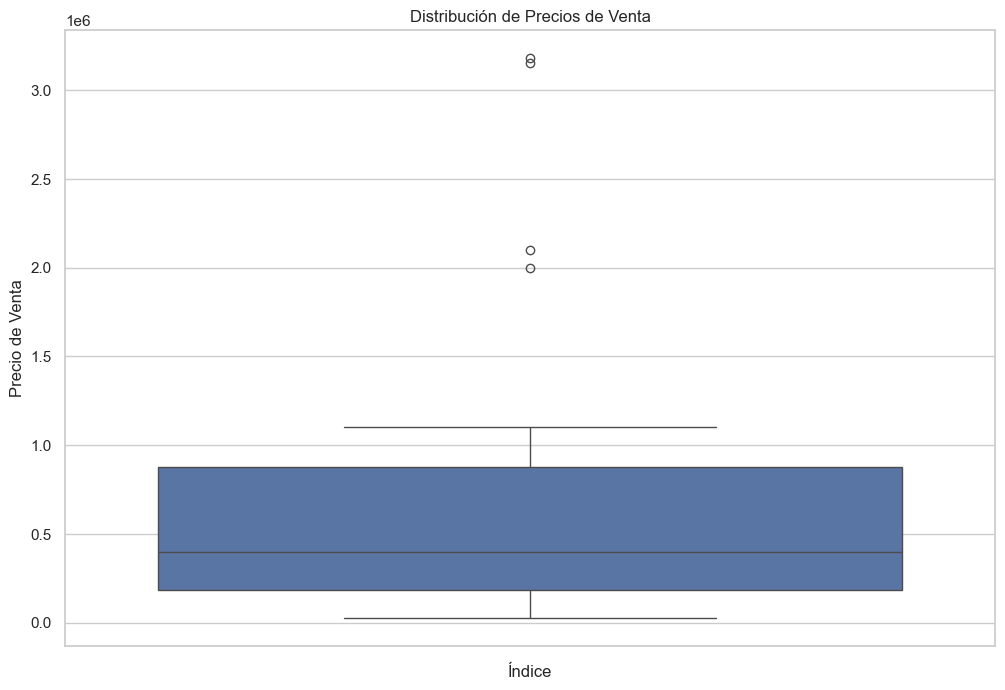

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Histograma de precios de venta
plt.figure(figsize=(10, 6))
sns.histplot(df_limpio['askingPrice'], kde=True, bins=20)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de precios de venta
plt.figure(figsize=(12, 8))
sns.boxplot(y='askingPrice', data=df_limpio)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Índice')
plt.ylabel('Precio de Venta')
plt.show()

### Conclusiones del Histograma:
1. **Distribución de Precios**: El histograma muestra la distribución de los precios de venta. La mayoría de los negocios tienen precios de venta que se concentran en un rango específico.
2. **Moda**: La moda (el valor que aparece con mayor frecuencia) se puede identificar visualmente como el pico más alto en el histograma.
3. **Sesgo**: Si el histograma está sesgado hacia la derecha o hacia la izquierda, esto indica que la mayoría de los precios de venta están por debajo o por encima de la media, respectivamente.
4. **Presencia de Outliers**: Si hay barras aisladas lejos del resto de la distribución, esto indica la presencia de outliers (valores atípicos).

### Conclusiones del Boxplot:
1. **Mediana**: La línea dentro de la caja representa la mediana del precio de venta, que es el valor central de la distribución.
2. **Rango Intercuartílico (IQR)**: La caja representa el rango intercuartílico, que es el rango en el que se encuentra el 50% central de los datos.
3. **Outliers**: Los puntos fuera de los "bigotes" del boxplot son outliers. Estos son precios de venta que están significativamente por encima o por debajo del rango intercuartílico.
4. **Simetría**: Si la caja y los bigotes están equilibrados alrededor de la mediana, la distribución es simétrica. Si no, la distribución está sesgada.

En resumen, el histograma nos da una visión general de la distribución de los precios de venta, mientras que el boxplot nos proporciona información más detallada sobre la mediana, el rango intercuartílico y los outliers.